In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from datetime import datetime
from datetime import timezone

from math import cos, radians
import matplotlib.patches as mpatches

# Data uploading

In [2]:
# ['08', '01L', '01R', '26', '19R', '19L']
runway = "26"

YEARS = ["2019", "2020"]
MONTHS = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
WEEKS = [1,2,3,4,5]

runway_df = pd.DataFrame()

for year in YEARS:
        
    for month in MONTHS:
    
        for week in WEEKS:
        
            if week == 5 and month == '02' and not calendar.isleap(int(year)):
                    continue
                    
            filename = "../../Opensky/Data/ESSA/" + year + "/osn_ESSA_states_TMA_" + year + \
                       "_by_runways/osn_ESSA_states_TMA_" + year + "_" + month + "_week" + \
                       str(week) + "_by_runways/osn_arrival_ESSA_states_TMA_" + year + \
                       "_" + month + "_week" + str(week) + "_rwy" + runway + ".csv"
            week_df = pd.read_csv(filename, sep=' ', names = ['flightId', 'sequence', 'timestamp', \
                      'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
            
            runway_df = runway_df.append(week_df)

runway_df.set_index(['flightId', 'sequence'], inplace = True)

In [10]:
number_of_flights = len(runway_df.groupby(level='flightId'))
print(number_of_flights)

43585


In [3]:
def plot_TMA():
    
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    TMA_lon=[18.2130555555556, 18.5547222222222, 18.8469444444444, 19.3136111111111, 19.8280555555556, 19.2736111111111,
          18.9683333333333, 18.7547222222222, 18.5394444444444, 18.4572222222222, 17.9327777777778, 17.4569444444444,
          17.4077777777778, 17.2233333333333, 16.7077777777778, 16.2677777777778, 16.3183333333333, 16.4466666666667,
          17.5966666666667, 18.2130555555556];

    TMA_lat=[60.2994444444444, 60.2661111111111, 59.8827777777778, 60.0352777777778, 59.6736111111111, 59.5994444444444,
          59.255, 59.0419444444444, 58.8325, 58.7525, 58.5830555555556, 58.6163888888889, 58.9661111111111,
          58.9786111111111, 59.0119444444444, 59.0494444444444, 59.3238888888889, 59.7494444444444, 60.2327777777778,
          60.2994444444444];

    number_of_rwys = 4

    rwy1_lon=[17.9361345, 17.9791531944444];
    rwy1_lat=[59.6584189166667, 59.6638971944444 ];

    rwy2_lon=[17.9132249722222, 17.9237679722222];
    rwy2_lat=[59.637256, 59.6664016944444 ];

    rwy3_lon=[17.9507426111111, 17.9587480555556];
    rwy3_lat=[59.6263963888889, 59.6484673055556];

    central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
        
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)
 
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)

    
    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy1_lon,rwy1_lat, color="red")
    plt.plot(rwy2_lon,rwy2_lat, color="red")
    plt.plot(rwy3_lon,rwy3_lat, color="red")
    
    ELTOK_lon = 16.6503
    ELTOK_lat = 59.5861
    HMR_lon = 18.3917
    HMR_lat = 60.2794
    XILAN_lon = 19.0761
    XILAN_lat = 59.6594
    NILUG_lon = 17.8847
    NILUG_lat = 58.8158

    plt.plot(HMR_lon, HMR_lat, 'ro')
    plt.plot(NILUG_lon, NILUG_lat, 'ro')
    plt.plot(XILAN_lon, XILAN_lat, 'ro')
    plt.plot(ELTOK_lon, ELTOK_lat, 'ro')

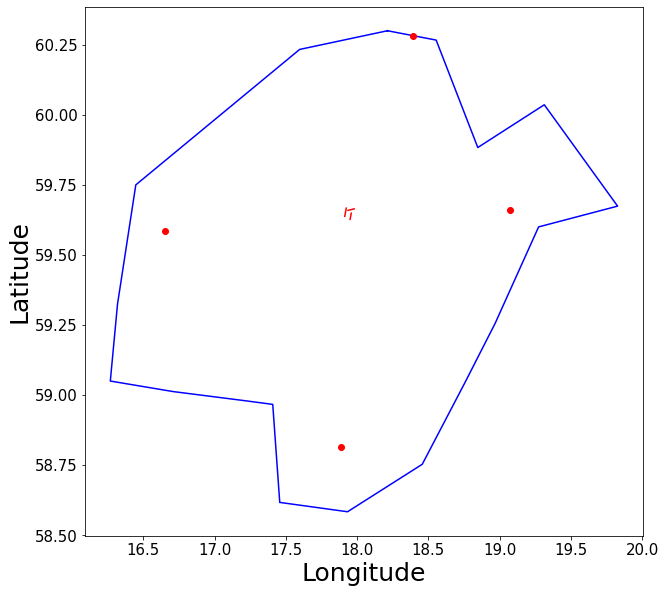

In [4]:
plot_TMA()

In [5]:
def get_color(cluster):
    if cluster == 1:
        return 'lime'
    if cluster == 2:
        return 'brown'
    if cluster == 3:
        return 'orange'
    if cluster == 4:
        return 'green'
    if cluster == 5:
        return 'cyan'
    if cluster == 6:
        return 'darkviolet'
    if cluster == 7:
        return 'magenta'
    if cluster == 8:
        return 'pink'
    if cluster == 9:
        return 'darkblue'
    if cluster == 10:
        return 'darkcyan'

In [6]:
def plot_legend(number_of_clusters):
    handles = []
    for i in range(0, number_of_clusters):
        cluster_color = get_color(i+1)
        color_patch = mpatches.Patch(color=cluster_color, label='cluster ' + str(i+1))
        handles += [color_patch]
    plt.legend(handles=handles, fontsize=10, loc="best")

In [7]:
def plot_horizontal_profile_clustering(df, number_of_clusters, clustering_df):
    linewidth = 1
    #fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    #mercator_aspect_ratio = 1/cos(radians(central_lat))

    # set the aspect ratio of the axes to that
    #ax.set_aspect(mercator_aspect_ratio)

    #plt.xlabel('Longitude', fontsize=25)
    #plt.ylabel('Latitude', fontsize=25)  
    
    #plt.tick_params(labelsize=15)
    
    plot_TMA()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flightId'):
        #print(flight_id)
        flight_states_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        
        #print(flight_states_df.tail())
        for seq, row in flight_states_df.groupby(level='sequence'):
        
            lon.append(row['lon'].item())
            lat.append(row['lat'].item())
        
        color = get_color(clustering_df.loc[flight_id]['cluster'])
        plt.plot(lon, lat, color=color, linewidth=linewidth)
        plt.plot(clustering_df.loc[flight_id]['center_lon'], clustering_df.loc[flight_id]['center_lat'], 'ko')
    plot_legend(number_of_clusters)

In [8]:
number_of_clusters = 6
filename = "../Data/Clustering/osn_arrival_ESSA_TMA_rwy" + runway +"_clusters_" + str(number_of_clusters) + ".csv"
clusters_df = pd.read_csv(filename, sep=' ')
clusters_df.set_index(['flightId'], inplace=True)

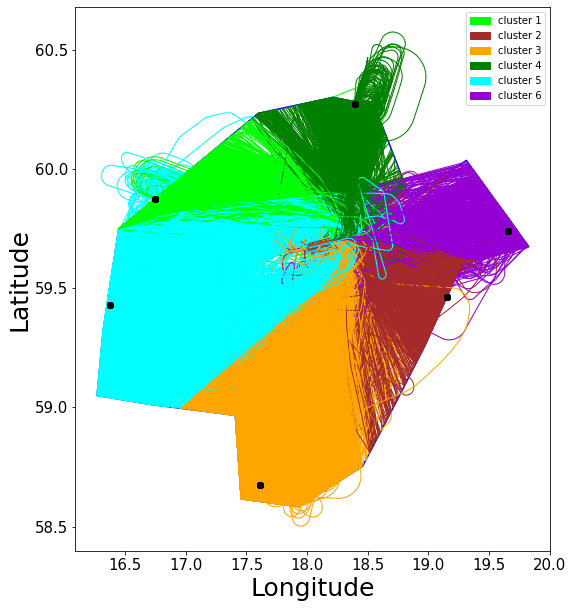

In [9]:
plot_horizontal_profile_clustering(runway_df, number_of_clusters, clusters_df)